# 한글 워드 클라우드 - 여친선물

#### KoNLpy 설치


In [33]:
import konlpy
konlpy.__version__

'0.5.2'

In [34]:
# Open Korean Text
from konlpy.tag import Okt
okt  = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')

['해당', '에러', '발생', '것', '알', '수']

#### 여친 선물 - 워드 클라우드 만들기

In [47]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()
    

In [48]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [49]:
# 한글 이외의 글자는 제거
import re 
new_tokens = []
for token in tokens:
    new_token = re.sub('[^가-힣 ]','', token)
    if new_token:                   # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [50]:
# 한글 폰트 사용
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 처리

In [39]:
import nltk

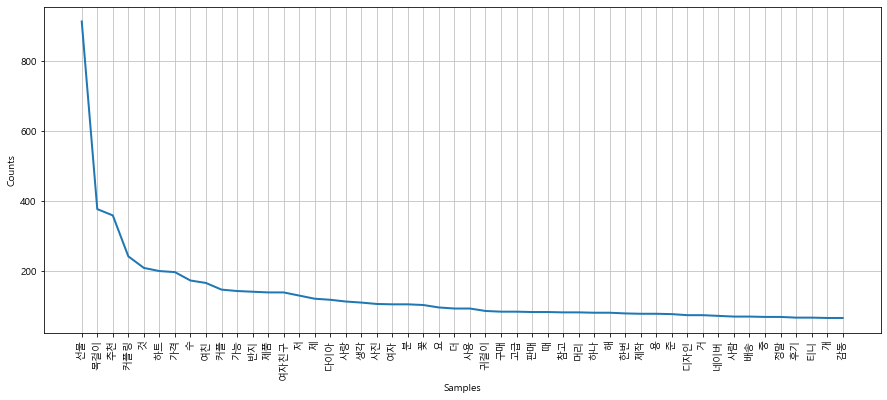

In [51]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [52]:
stop_words = '선물 추천 '
stop_list = stop_words.split()

# new_token_list = []
# for tokne in new_tokens:
#    if token not in stop_list:
#        new_token_list.append(token)
# new_tokens = new_token_list

In [53]:
# 리스트 표현식으로 
new_tokens = [token for token in new_tokens if token not in stop_list]

- 워드 클라우드 그리기

In [54]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [55]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('선물', 914),
 ('목걸이', 378),
 ('추천', 360),
 ('커플링', 243),
 ('것', 210),
 ('하트', 201),
 ('가격', 198),
 ('수', 174),
 ('여친', 167),
 ('커플', 148)]

In [56]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, 
    background_color='white'
).generate_from_frequencies(dict(data))

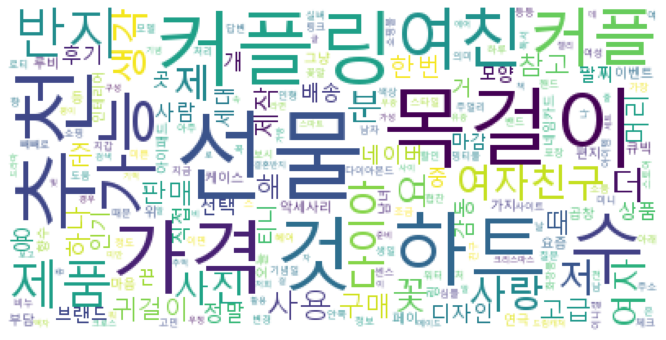

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트그림에 표시하기

In [58]:
# 하트그림에 표시하기
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [59]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

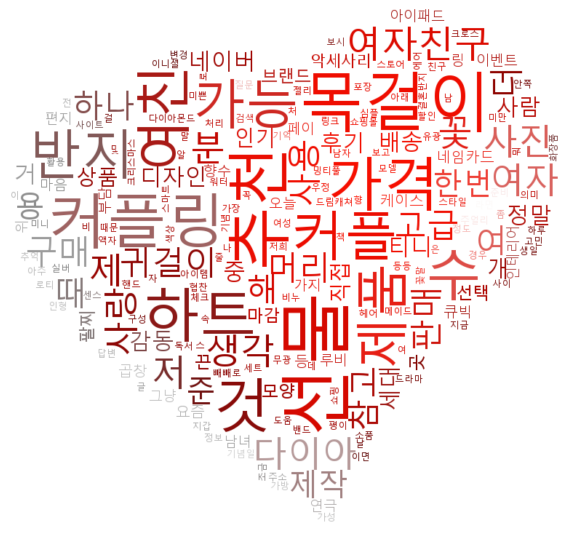

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()